<a href="https://colab.research.google.com/github/ianimeshjain/Exploratory_data_analysis_Fake_Job/blob/main/Regression_Modelling_Fake_Job_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import os
from google.colab import files

import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix , classification_report
from sklearn.inspection import permutation_importance
sklearn.set_config(print_changed_only=True)

In [ ]:
df = pd.read_csv('datasetv2.csv')

df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.head()
df.shape

(2864, 17)

In [ ]:
df.isnull().any()

title                  False
location                True
department              True
salary_range            True
company_profile         True
description             True
requirements            True
benefits                True
telecommuting          False
has_company_logo       False
has_questions          False
employment_type         True
required_experience     True
required_education      True
industry                True
function                True
fraudulent             False
dtype: bool

In [ ]:
df.drop(['title','location','department','salary_range','benefits','industry','function','required_education'], axis = 1, inplace = True)

In [ ]:
df.shape

(2864, 9)

In [ ]:
df.isnull().any()

company_profile         True
description             True
requirements            True
telecommuting          False
has_company_logo       False
has_questions          False
employment_type         True
required_experience     True
fraudulent             False
dtype: bool

In [ ]:
df['company_profile'] = df['company_profile'].fillna('missing')

In [ ]:
df['description'] = df['description'].fillna('missing')

In [ ]:
df['requirements'] = df['requirements'].fillna('missing')

In [ ]:
df['employment_type'] = df['employment_type'].fillna('missing')

In [ ]:
df['required_experience'] = df['required_experience'].fillna('missing')

In [ ]:
df.isnull().any()

company_profile        False
description            False
requirements           False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
fraudulent             False
dtype: bool

In [ ]:
df.head()

,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,missing,missing,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,0


In [ ]:
df.drop(['description'], axis = 1, inplace = True)

In [ ]:
df.head()

,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent
0,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,1,0,Other,Internship,0
1,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,0
2,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,1,0,missing,missing,0
3,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,0
4,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,0


In [ ]:
df['company_profile_len'] = df.company_profile.apply(len)

In [ ]:
df.head()

,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent,company_profile_len
0,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,1,0,Other,Internship,0,885
1,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,0,1286
2,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,1,0,missing,missing,0,879
3,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,0,614
4,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,0,1628


In [ ]:
df['requirements_len'] = df.requirements.apply(len)

In [ ]:
df.head()

,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent,company_profile_len,requirements_len
0,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,1,0,Other,Internship,0,885,852
1,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,0,1286,1433
2,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,1,0,missing,missing,0,879,1363
3,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,0,614,1429
4,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,0,1628,757


In [ ]:
df.drop(['company_profile'], axis = 1, inplace = True)

In [ ]:
df.drop(['requirements'], axis = 1, inplace = True)

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent,company_profile_len,requirements_len
0,0,1,0,Other,Internship,0,885,852
1,0,1,0,Full-time,Not Applicable,0,1286,1433
2,0,1,0,missing,missing,0,879,1363
3,0,1,0,Full-time,Mid-Senior level,0,614,1429
4,0,1,1,Full-time,Mid-Senior level,0,1628,757


In [ ]:
df['required_experience'] = df.required_experience.astype("category").cat.codes

In [ ]:
df = pd.get_dummies(df, columns = ['employment_type'])

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,required_experience,fraudulent,company_profile_len,requirements_len,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_missing
0,0,1,0,4,0,885,852,0,0,1,0,0,0
1,0,1,0,6,0,1286,1433,0,1,0,0,0,0
2,0,1,0,7,0,879,1363,0,0,0,0,0,1
3,0,1,0,5,0,614,1429,0,1,0,0,0,0
4,0,1,1,5,0,1628,757,0,1,0,0,0,0


In [ ]:
df.shape

(2864, 13)

In [ ]:
X=df.copy()
Y=X['fraudulent']


In [ ]:
X= X.drop(['fraudulent'], axis=1)

In [ ]:
X.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'company_profile_len', 'requirements_len',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'employment_type_missing'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)
X_train

,telecommuting,has_company_logo,has_questions,required_experience,company_profile_len,requirements_len,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_missing
2122,0,1,1,5,7,888,1,0,0,0,0,0
899,0,1,1,0,1025,315,0,1,0,0,0,0
1735,0,1,0,6,405,1613,0,1,0,0,0,0
2790,0,0,0,2,7,7,0,0,0,0,1,0
794,0,1,1,7,53,130,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,1,0,6,7,7,0,1,0,0,0,0
835,0,1,1,7,588,868,0,1,0,0,0,0
1653,0,1,1,7,310,840,0,0,0,0,0,1
2607,0,0,0,7,7,7,0,1,0,0,0,0


In [ ]:
X_train.shape

(2148, 12)

In [ ]:
X_test.shape

(716, 12)

In [ ]:

from sklearn.linear_model import LogisticRegression
 
ml=LogisticRegression()
ml.fit(X_train, y_train)
print(ml.score(X_train, y_train))
print(ml.score(X_test, y_test))
score = ml.score(X_test, y_test)

0.7588454376163873
0.7779329608938548


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions = ml.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
pcm =  metrics.classification_report(y_test, predictions)
print(pcm)

[[405  95]
 [ 64 152]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       500
           1       0.62      0.70      0.66       216

    accuracy                           0.78       716
   macro avg       0.74      0.76      0.75       716
weighted avg       0.79      0.78      0.78       716



Text(0.5, 0, 'PREDICTIONS')

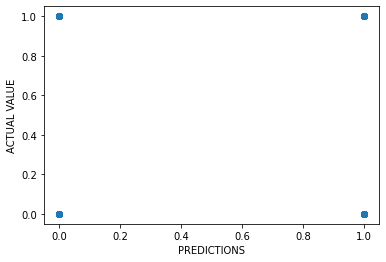

In [ ]:
plt.scatter(predictions,y_test)
plt.ylabel('ACTUAL VALUE')
plt.xlabel('PREDICTIONS')

In [ ]:
x = df['telecommuting']
y = df['fraudulent']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

KeyError: ignored

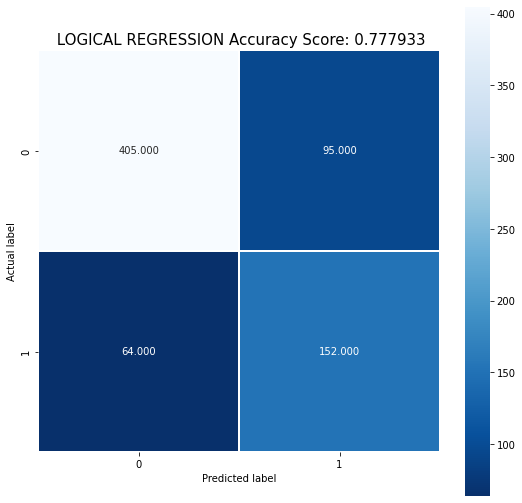

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = ' LOGICAL REGRESSION Accuracy Score: {:3f}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
y_pred= rf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
fcm = confusion_matrix(y_test,y_pred)
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
#print("Recall :", recall_score(y_test, y_pred, pos_label='stroke') * 100)
#print("Precision :", precision_score(y_test, y_pred, pos_label='stroke patients') * 100)


0.9743947858472998
0.8505586592178771
Confusion Matrix:
[[448  52]
 [ 55 161]]
Accuracy : 85.05586592178771


In [ ]:
Rscore = rf.score(X_test, y_test)
Rscore

0.8505586592178771

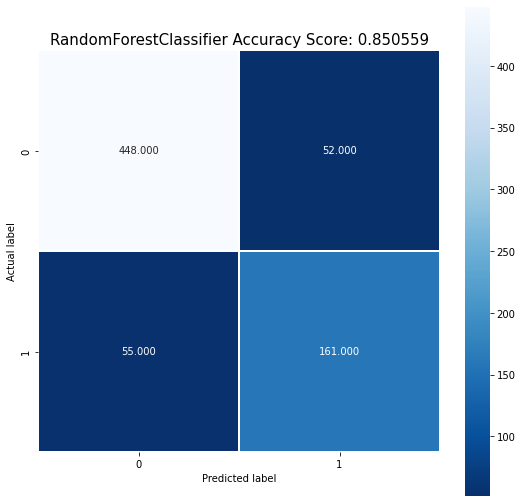

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(fcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RandomForestClassifier Accuracy Score: {:3f}'.format(Rscore)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
knscore = metrics.accuracy_score(y_test, y_pred)
knscore

0.7653631284916201


0.7653631284916201

In [ ]:
kcm = confusion_matrix(y_test,y_pred)
kcm

array([[408,  92],
       [ 76, 140]])

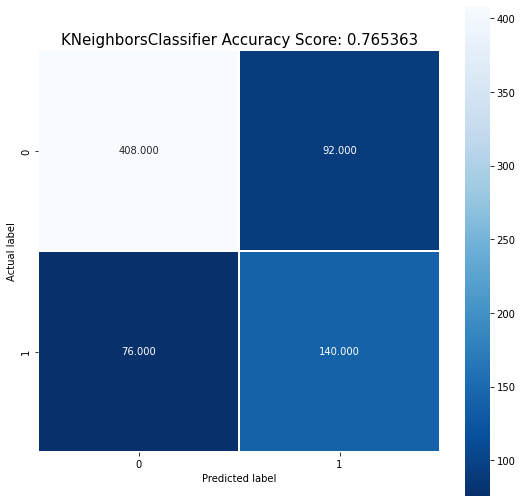

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(kcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'KNeighborsClassifier Accuracy Score: {:3f}'.format(knscore)
plt.title(all_sample_title, size = 15);

In [ ]:
def plot_pie(column, title="All"):
  fig,axs = plt.subplots(1,1)
  data = df[column].value_counts()
  plt.pie(data,autopct= '%1.2f%%',labels=data.index)
  plt.title(title)
  plt.show()

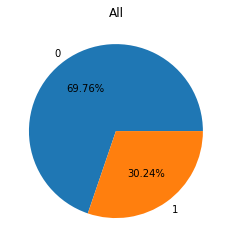

In [ ]:
plot_pie('fraudulent')